In [8]:
import whisper
import ffmpeg
import youtube_dl
import re
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pytube import YouTube


Enter the YouTube video URL: https://youtu.be/AFTIVN8rRbI?feature=shared
Video downloaded to: /home/sahilsomaji/Sajni (Full Video) Arijit Singh Ram Sampath  Laapataa Ladies   Aamir Khan Productions.mp4


/home/sahilsomaji/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Number of segments: 2


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Generated GIF: output_1718688482_0.gif
Displaying GIF: output_1718688482_0.gif


frame=  847 fps=331 q=-0.0 Lsize=   45049kB time=00:01:24.61 bitrate=4361.7kbits/s speed=  33x    
video:45049kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000043%


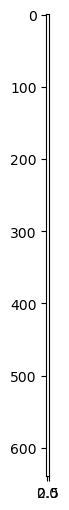

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Generated GIF: output_1718688482_1.gif
Displaying GIF: output_1718688482_1.gif


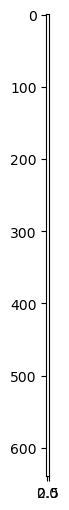

Submitted the following GIFs:
Daily Update: Completed the assignment successfully!


In [14]:
import whisper
import ffmpeg
import youtube_dl
import re
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pytube import YouTube
import time

# Step 1: Input Video
def get_video_from_url(url):
    yt = YouTube(url)
    video = yt.streams.filter(only_audio=False).first()
    video_filename = f"{yt.video_id}.mp4"
    video_path = video.download()
    print(f"Video downloaded to: {video_path}")
    return video_filename

# Step 2: Transcribe Video
def transcribe_video(video_file):
    model = whisper.load_model("base")
    result = model.transcribe(video_file)
    return result["text"]

# Step 3: Segment Transcript
def segment_transcript(transcript):
    sentences = re.split(r'[.!?]\s*', transcript)
    segments = []
    current_segment = ""
    for sentence in sentences:
        if len(current_segment) + len(sentence) > 100:  # Adjust the length as needed
            segments.append(current_segment.strip())
            current_segment = sentence + " "
        else:
            current_segment += sentence + " "
    if current_segment:
        segments.append(current_segment.strip())
    print(f"Number of segments: {len(segments)}")  # Print the number of segments
    return segments

# Step 4: Generate GIFs
def generate_gifs(video_file, segments):
    probe = ffmpeg.probe(video_file)
    video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
    width = video_info['width']
    height = video_info['height']
    duration = float(video_info['duration'])

    gif_artists = []
    timestamp = int(time.time())

    for i, segment in enumerate(segments):
        start_time = duration * (i / len(segments))
        end_time = duration * ((i + 1) / len(segments))
        output_filename = f"output_{timestamp}_{i}.gif"  # Include timestamp in the filename
        stream = ffmpeg.input(video_file, ss=start_time, t=end_time - start_time)
        stream = ffmpeg.filter(stream, 'fps', fps=10)  # Adjust the FPS as needed
        stream = ffmpeg.output(stream, output_filename, r=10)  # Adjust the bit rate as needed
        ffmpeg.run(stream, overwrite_output=True)
        print(f"Generated GIF: {output_filename}")  # Print the generated GIF filename

        # Create an AxesImage object for the GIF
        fig, ax = plt.subplots(figsize=(8, 6))
        gif = plt.imread(output_filename, format='gif')
        artist = ax.imshow(gif[0])
        gif_artists.append([artist])  # Append a list containing the artist

        # Display the generated GIF
        print(f"Displaying GIF: {output_filename}")
        ani = animation.ArtistAnimation(fig, [gif_artists[-1]], interval=50, blit=True, repeat_delay=1000)
        plt.show()

        plt.close(fig)  # Close the figure to free memory

    return gif_artists


# Step 5: Submit Assignment (Example implementation)
def submit_assignment(gif_files):

    print("Submitted the following GIFs:")
    for gif_file in gif_files:
        print(gif_file)

# Step 6: Daily Updates (Example implementation)
def send_daily_update(message):

    print(f"Daily Update: {message}")

# Main function
def main():
    video_url = input("Enter the YouTube video URL: ")
    video_file = get_video_from_url(video_url)
    transcript = transcribe_video(video_file)
    segments = segment_transcript(transcript)
    gif_artists = generate_gifs(video_file, segments)
    submit_assignment(gif_artists)
    send_daily_update("Completed the assignment successfully!")


if __name__ == "__main__":
    main()